# Machine Learning 2024
Jonnatan Arias G.
Uniquindio - Utp

Jariasg@uniquindio.edu.co
jonnatan.arias@utp.edu.co

## Redes neuronales con tensor flow

Nota:Cambiar CPU a TPU

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

# Introducción. Tensorflow - Keras y REPASO

A partir de la documentación oficial de keras (https://keras.io/), keras se describe de la siguiente manera.

"Keras es una API de redes neuronales de alto nivel, escrita en Python y capaz de ejecutarse sobre TensorFlow, CNTK o Theano. Fue desarrollado con un enfoque en permitir una experimentación rápida.

Utilice Keras si necesita una biblioteca de aprendizaje profundo que:

Permite la creación de prototipos fácil y rápida (gracias a la facilidad de uso, la modularidad y la extensibilidad).

Admite tanto redes convolucionales como redes recurrentes, así como combinaciones de ambas.

Funciona sin problemas en CPU y GPU".

Keras es un módulo muy potente que nos permite evitar tener que construir redes neuronales desde cero. También esconde mucha complejidad matemática (que de otro modo tendríamos que implementar) dentro de paquetes, módulos y métodos útiles.


## ¿Qué es una red neuronal?

Entonces, ¿qué son estas cosas mágicas que han estado venciendo a grandes maestros de ajedrez, conduciendo coches, detectando células cancerosas y ganando videojuegos?

Una red neuronal **profunda** es una representación en capas de datos. El término "profundo" se refiere a la presencia de múltiples capas.

Recuerde que en nuestros algoritmos de aprendizaje centrales (como la regresión lineal) los datos no se transformaban ni modificaban dentro del modelo, simplemente existían en una capa.

Pasamos algunas características a nuestro modelo, se hicieron algunos cálculos y se devolvió una respuesta.

Los datos no se modificaron ni transformaron a lo largo de este proceso. Una red neuronal procesa nuestros datos de manera diferente.

Intenta representar nuestros datos de diferentes maneras y en diferentes dimensiones mediante la aplicación de operaciones específicas para transformar nuestros datos en cada capa.

Otra forma de expresar esto es que en cada capa nuestros datos se transforman para aprender más sobre ellos.

Al realizar estas transformaciones, el modelo puede comprender mejor nuestros datos y, por lo tanto, proporcionar una mejor predicción.

## Cómo funciona

Las redes neuronales son simplemente una combinación de operaciones matemáticas elementales y algo de álgebra lineal más avanzada. Cada red neuronal consta de una secuencia de capas por las que pasan los datos. Estas capas están formadas por neuronas y las neuronas de una capa están conectadas a la siguiente (ver más abajo). Estas conexiones están definidas por lo que llamamos un peso (algún valor numérico). Cada capa también tiene algo llamado sesgo, esto es simplemente una neurona adicional que no tiene conexiones y tiene un solo valor numérico. Los datos comienzan en la capa de entrada y se transforman a medida que pasan a través de las capas posteriores. Los datos en cada neurona subsiguiente se definen de la siguiente manera.
> $Y =(\sum_{i=0}^n w_i x_i) + b$


> $w$ representa el peso de cada conexión a la neurona

> $x$ representa el valor de la neurona conectada del valor anterior

> $b$ representa el sesgo en cada capa, esta es una constante

> $n$ es el número de conexiones

> $Y$ es la salida de la neurona actual

> $\sum$ significa suma

La ecuación que acabas de leer se llama suma ponderada. Tomaremos esta suma ponderada en todas y cada una de las neuronas a medida que pasemos información a través de la red. Luego agregaremos lo que se llama un sesgo a esta suma. El sesgo nos permite desplazar la red hacia arriba o hacia abajo en un valor constante. Es como la intersección con el eje y de una recta.

¡Pero esa ecuación no está completa! Nos olvidamos de una parte crucial, la función de activación. Esta es una función que aplicamos a la ecuación vista anteriormente para agregar complejidad y dimensionalidad a nuestra red. A continuación se muestra nuestra nueva ecuación con la adición de una función de activación $F(x)$.

> $Y =F((\sum_{i=0}^n w_i x_i) + b)$

Nuestra red comenzará con funciones de activación predefinidas (pueden ser diferentes en cada capa) pero con pesos y sesgos aleatorios. A medida que entrenamos la red alimentándola con datos, aprenderá los pesos y sesgos correctos y ajustará la red en consecuencia utilizando una técnica llamada retropropagación (que se explica a continuación). Una vez que se hayan aprendido las ponderaciones y los sesgos correctos, es de esperar que nuestra red pueda darnos predicciones significativas. Obtenemos estas predicciones observando los valores en nuestra capa final, la capa de salida.

## ¡Rompiendo la red neuronal!
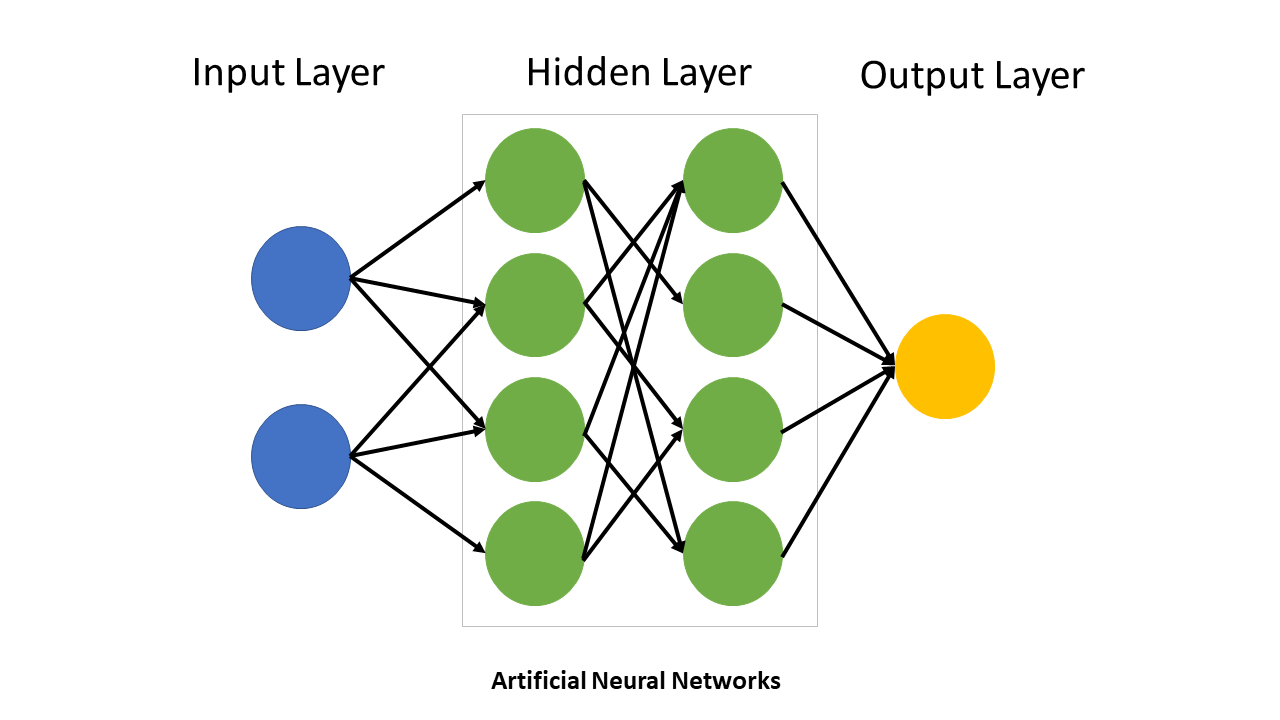

### Datos

El tipo de datos que procesa una red neuronal varía drásticamente en función del problema que se resuelva. Cuando construimos una red neuronal, definimos qué forma y tipo de datos puede aceptar. A veces puede ser necesario modificar nuestro conjunto de datos para que pueda pasarse a nuestra red neuronal.

A continuación se enumeran algunos tipos comunes de datos que utiliza una red neuronal.
(la primera Dimensión son el # de elementos)

Datos vectoriales (2D)

Series temporales o secuencias (3D)

Datos de imagen (4D)  ancho, alto, color

Datos de vídeo (5D)  ancho, alto, color, tiempo


Por supuesto, hay muchos tipos o datos diferentes, pero estas son las categorías principales.

### Capas

Cada red neuronal consta de varias capas. En cada capa se produce una transformación diferente de los datos. Nuestros datos de entrada iniciales pasan a través de las capas y finalmente llegan a la capa de salida donde obtendremos el resultado.

#### **Capa de entrada**
La capa de entrada es la capa a la que se pasan nuestros datos iniciales. Es la primera capa de nuestra red neuronal.

#### **Capa de salida**
La capa de salida es la capa de la que recuperaremos nuestros resultados. Una vez que los datos hayan pasado por todas las demás capas, llegarán aquí.

#### **Capas ocultas**
Todas las demás capas de nuestra red neuronal se denominan "capas ocultas". Esto se debe a que están ocultos para nosotros, no podemos observarlos. La mayoría de las redes neuronales constan de al menos una capa oculta, pero pueden tener una cantidad ilimitada. Normalmente, cuanto más complejo es el modelo, más capas ocultas hay.

#### **Neuronas**
Cada capa está formada por lo que se llaman neuronas. Las neuronas tienen algunas propiedades diferentes que discutiremos más adelante. El aspecto importante que debemos entender ahora es que cada neurona es responsable de generar/mantener/pasar UN valor numérico.

Esto significa que en el caso de nuestra capa de entrada tendrá tantas neuronas como información de entrada tengamos. Por ejemplo, digamos que queremos pasar una imagen de 28x28 píxeles, es decir, 784 píxeles. Necesitaríamos 784 neuronas en nuestra capa de entrada para capturar cada uno de estos píxeles.

Esto también significa que nuestra capa de salida tendrá tantas neuronas como información de salida tengamos. El resultado es un poco más complicado de entender.

Pero ¿qué pasa con nuestras capas ocultas? Pues estas tienen tantas neuronas como decidamos. Por otro lado, Una capa oculta puede tener cualquier cantidad de neuronas.

### Capas conectadas

Entonces, ¿cómo se conectan todas estas capas? Bueno, las neuronas de una capa se conectarán a las neuronas de la capa siguiente. Sin embargo, las neuronas se pueden conectar de diferentes maneras.

Tomemos, por ejemplo, la Figura 1 (ver arriba). Cada neurona de una capa está conectada a cada neurona de la siguiente capa. Esto se llama capa densa. Hay muchas otras formas de conectar capas, pero las analizaremos tal como las vemos.

### Pesos $w$

Los pesos están asociados con cada conexión en nuestra red neuronal. Cada par de nodos conectados tendrá un peso que denota la fuerza de la conexión entre ellos. Estos son vitales para el funcionamiento interno de una red neuronal y se modificarán a medida que se entrene la red neuronal. El modelo intentará determinar cuáles deberían ser estos pesos para lograr el mejor resultado. Los pesos comienzan con un valor constante o aleatorio y cambiarán a medida que la red vea los datos de entrenamiento.

### Biases - Sesgos

Los sesgos son otra parte importante de las redes neuronales y también se modificarán a medida que se entrene el modelo. Un sesgo es simplemente un valor constante asociado con cada capa.

Se puede considerar como una neurona adicional que no tiene conexiones. El propósito de un sesgo es desplazar una función de activación completa en un valor constante. Esto permite mucha más flexibilidad a la hora de elegir una activación y entrenar la red. Hay un sesgo para cada capa.

### Función de activación

Las funciones de activación son simplemente una función que se aplica a la suma ponderada de una neurona. Pueden ser cualquier cosa que queramos, pero normalmente son funciones de orden/grado superior que tienen como objetivo agregar una dimensión superior a nuestros datos.

Nos gustaría hacer esto para introducir más complexidad en nuestro modelo. Al transformar nuestros datos a una dimensión superior, normalmente podemos hacer predicciones mejores y más complejas.

A list of some common activation functions and their graphs can be seen below.
A continuación se puede ver una lista de algunas funciones de activación comunes y sus gráficos.

- Relu (Rectified Linear Unit)

![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
- Tanh (Hyperbolic Tangent)

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
- Sigmoid

![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)


### Backpropagation - Propagación hacia atrás

La retropropagación es el algoritmo fundamental detrás del entrenamiento de redes neuronales. Es lo que cambia los pesos y sesgos de nuestra red. Para explicar completamente este proceso, debemos comenzar analizando algo llamado función de costo/pérdida.

### Loss/Cost - Función de pérdida/costo

Como sabemos ahora, nuestra red neuronal alimenta información a través de las capas hasta que finalmente llega a una capa de salida. Esta capa contiene los resultados que analizamos para determinar la predicción de nuestra red. En la fase de formación es probable que nuestra red cometa muchos errores y malas predicciones. De hecho, al comienzo del entrenamiento nuestra red no sabe nada (¡tiene pesos y sesgos aleatorios)!

Necesitamos alguna forma de evaluar si la red está funcionando bien y en qué medida. Para nuestros datos de entrenamiento tenemos las características (entrada) y las etiquetas (salida esperada), debido a esto podemos comparar la salida de nuestra red con la salida esperada. En función de la diferencia entre estos valores podemos determinar si nuestra red ha hecho un buen o mal trabajo. Si la red ha hecho un buen trabajo, haremos cambios menores en los pesos y sesgos. Si ha hecho un mal trabajo nuestros cambios pueden ser más drásticos.

Entonces, aquí es donde entra en juego la función de costo/pérdida. Esta función es responsable de determinar qué tan bien funcionó la red. Le pasamos la salida y la salida esperada, y nos devuelve algún valor que representa el costo/pérdida de la red. Esto efectivamente hace que las redes trabajen para optimizar esta función de costo, tratando de hacerlo lo más bajo posible.

Algunas funciones comunes de pérdida/costo incluyen.

* Mean Squared Error
* Mean Absolute Error
* ...

### Gradient Descent - Descenso de gradiente

El descenso de gradiente y la retropropagación están estrechamente relacionados. El descenso de gradiente es el algoritmo utilizado para encontrar los parámetros óptimos (pesos y sesgos) para nuestra red, mientras que la retropropagación es el proceso de calcular el gradiente que se utiliza en el paso de descenso de gradiente.

El descenso de gradiente requiere un cálculo bastante avanzado y álgebra lineal para comprenderlo, La definición formal.

"El descenso de gradiente es un algoritmo de optimización que se utiliza para minimizar alguna función moviéndose iterativamente en la dirección del descenso más pronunciado definido por el negativo del gradiente. En el aprendizaje automático, utilizamos el descenso de gradiente para actualizar los parámetros de nuestro modelo". (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

![alt text](https://cdn-images-1.medium.com/max/1000/1*iU1QCnSTKrDjIPjSAENLuQ.png)



### Optimizador

Es posible que en ocasiones vea el término optimizador u función de optimización. Esta es simplemente la función que implementa el algoritmo de retropropagación descrito anteriormente. Aquí hay una lista de algunos de los más comunes.

* Gradient Descent
* Stochastic Gradient Descent
* Mini-Batch Gradient Descent
* Momentum
* Nesterov Accelerated Gradient

Este artículo los explica bastante bien y es de donde saqué esta lista.

(https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

#Parte 1. Clasificador de Imagen Classifier Using the Sequential API

En el siguiente bloque se carga la base de datos Fashion MNIST, que corresponde a imágenes de prendas de vestir de 28 x 28 píxeles en escala de grises, distribuídas en 10 categorías.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

4422102/4422102 [==============================] - 1s 0us/step
#imagen, Alto, Ancho: (60000, 28, 28)
etiquetas (60000,)
Test #imagen, Alto, Ancho: (10000, 28, 28)
test etiquetas (10000,)


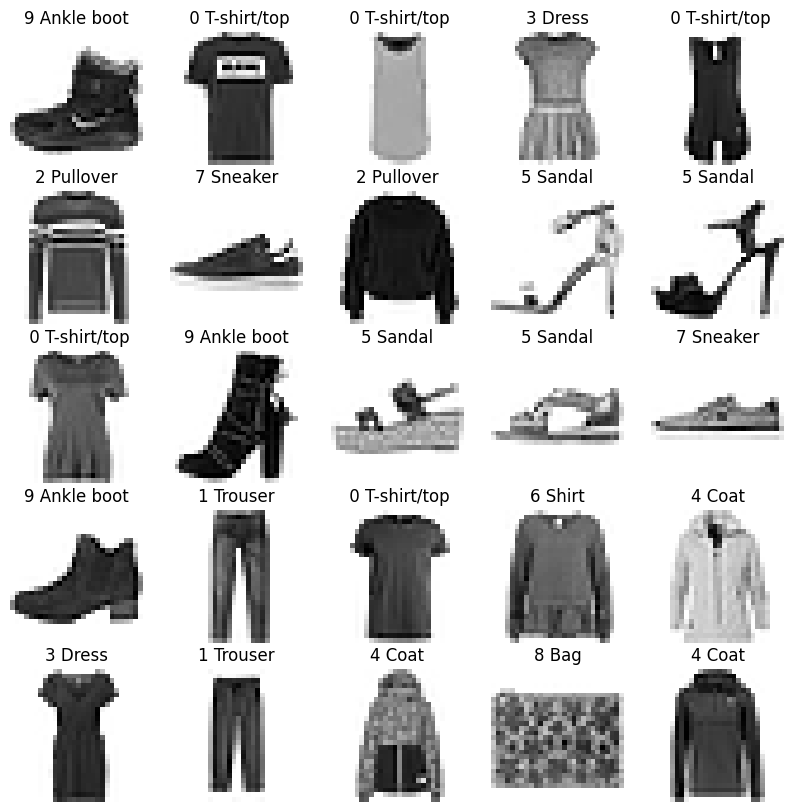

In [3]:
import matplotlib.pyplot as plt
# Etiquetas de las clases en Fashion MNIST
class_names = [' 0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat',
               '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print("#imagen, Alto, Ancho:",X_train_full.shape)
print("etiquetas",y_train_full.shape)
print("Test #imagen, Alto, Ancho:",X_test.shape)
print("test etiquetas",y_test.shape)
# Mostrar algunas imágenes con sus etiquetas
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train_full[i]])
    plt.axis('off')
plt.show()

Como las imágenes se cargan como enteros de 8 bits, se preprocesarán reescalando las intensidades a valores entre 0 y 1 y convirtiéndolos a flotantes, ademas sacaremos 5000 para validar.

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print("#imagen, Alto, Ancho:",X_train.shape)
print("etiquetas",y_train.shape)

print(X_valid.dtype)
print(X_valid.min(),X_valid.max())

#imagen, Alto, Ancho: (55000, 28, 28)
etiquetas (55000,)
float64
0.0 1.0


OJO:
Datos de Entrenamiento? - Sobre los cuales adaptamos los pesos de nuestro modelo (datos + etiquetas)
Datos de validación? - Sobre datos que se usaran de prueba para ajustar hiperparametros dentro del modelo.
Datos de testeo? - Sobre los cuales probamos el entrenamiento, se usan para ver etiqueta predicha sobre la real


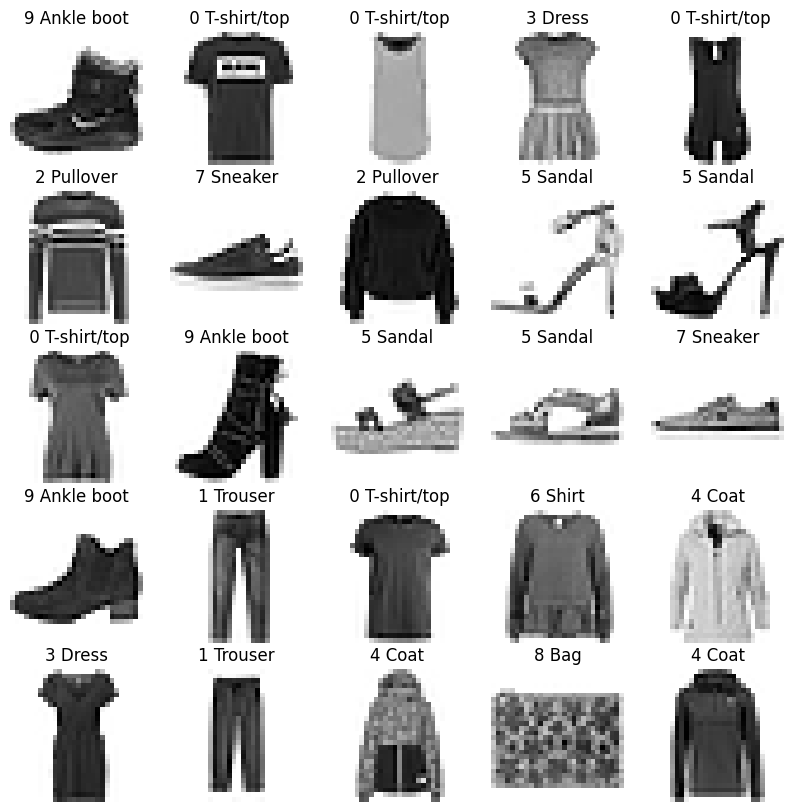

In [5]:
# Mostrar algunas imágenes con sus etiquetas
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_valid[i], cmap=plt.cm.binary)
    plt.title(class_names[y_valid[i]])
    plt.axis('off')
plt.show()

Con MNIST, cuando la etiqueta es igual a 5, significa que la imagen representa el dígito escrito a mano 5. Fácil. Para Fashion MNIST, sin embargo, necesitamos la lista de nombres de clases para saber a qué nos enfrentamos:

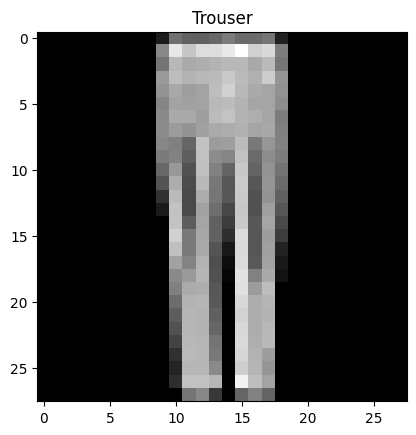

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


index = 90
plt.imshow(X_train[index],vmin=0,vmax=1.0,cmap='gray')
plt.title(class_names[y_train[index]])
plt.show()

##Creando el modelo de nuestra red, usando the Sequential API

¡Ahora construyamos la red neuronal! Aquí hay una clasificación MLP con dos capas ocultas:

In [7]:
#Esta línea crea un modelo secuencial. Este es el tipo de modelo más simple de
#Keras para redes neuronales que se componen de una sola pila de capas
#conectadas SECUENCIALMENTE. Esto se llama Sequential-API.
model = keras.models.Sequential()

#A continuación, construimos la primera capa y la agregamos al modelo.
#Es una capa Flatten cuya función es convertir cada imagen de entrada en una
#matriz 1D, que recibe datos de entrada X, calcula X.reshape (-1, 1).
#Esta capa no tiene ningún parámetro; solo está ahí para hacer un
#preprocesamiento simple.
#Dado que es la primera capa del modelo, debe especificar input_shape, que no
#incluye el tamaño del lote, solo la forma de las muestras.

# Capa 1: Esta es nuestra capa de entrada y estará formada por 784 neuronas.
#Usamos la capa aplanada con una forma de entrada de (28,28) para indicar que nuestra entrada debe tener esa forma.
#Aplanar significa que nuestra capa remodelará la matriz de formas (28,28) en un vector de 784 neuronas para
#que cada píxel se asocie con una neurona.
model.add(keras.layers.Flatten(input_shape=[28, 28]))

#A continuación, agregamos una capa oculta densa con 300 neuronas. Utilizará
#la función de activación de ReLU. Cada capa densa gestiona su propia matriz
#de pesos, que contiene todos los pesos de conexión entre las neuronas y sus
#entradas. También gestiona un vector de términos de intercepto/bias (uno por
#neurona). Cuando recibe algunos datos de entrada, calcula f(XW+b)
model.add(keras.layers.Dense(300, activation="relu"))

#Luego agregamos una segunda capa oculta densa con 100 neuronas, también usando
#la función de activación ReLU.
model.add(keras.layers.Dense(100, activation="relu"))

#FinalmentE,
#Capa 3: Esta es nuestra salida más adelante y también es una capa densa.
#Tiene 10 neuronas que veremos para determinar la salida de nuestros modelos.
#Cada neurona representa la probabilidad de que una imagen determinada sea una de las 10 clases diferentes.
#La función de activación softmax se utiliza en esta capa para calcular una distribución de probabilidad para cada clase.
#Esto significa que el valor de cualquier neurona en esta capa estará entre 0 y 1, donde 1 representa una alta probabilidad
#de que la imagen sea de esa clase.
model.add(keras.layers.Dense(10, activation="softmax"))

Una alternativa a agregar las capas una por una, como acabamos de hacer, es pasar una lista de capas al crear el modelo secuencial:

```
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                 ])
```



El método `summary()` del modelo muestra todas las capas del modelo, incluido el nombre de cada capa (que se genera automáticamente a menos que lo establezca al crear la capa), su forma de salida (`None` significa que el tamaño del lote puede ser cualquier cosa) y su número de parámetros.

El resumen termina con el número total de parámetros, incluidos los parámetros entrenables y no entrenables. Aquí solo tenemos parámetros entrenables:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


¡¡¡¡¡ ojo a los parametros  !!!

Maldición de la dimensionalidad (cuantos w calculamos)
<br>
Cada imagen tiene 28x28, param1
<br>
<br>
En la segundad capa (si es dense) seria param1*nodos+bias
<br><br>
La tercera capa tendria dias entradas previas+ los sesgos 110....

los parametros totales seria la suma de params por capa


Tenga en cuenta que las capas densas (`Dense`) suelen tener muchos parámetros. Esto le da al modelo bastante flexibilidad para ajustarse a los datos de entrenamiento, pero también significa que el modelo corre el riesgo de sobreajuste, especialmente cuando no tiene muchos datos de entrenamiento.

Puede obtener fácilmente la lista de capas de un modelo para obtener una capa por su índice o puede obtenerla por su nombre:

In [9]:
model.layers

In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense'

Se puede acceder a todos los parámetros de una capa usando sus métodos  `get_weights()` y `set_weights()`. Para una capa densa, esto incluye tanto los pesos de conexión como los términos de sesgo:

In [11]:
weights, biases = hidden1.get_weights()
print('Pesos:',weights.shape)
print(weights)
print('Interceptos:',biases.shape)
print(biases)

Pesos: (784, 300)
[[ 0.07038866 -0.0281294  -0.03331088 ...  0.01262882 -0.07131167
   0.06112696]
 [-0.0475134   0.04725579  0.04052389 ...  0.03690474 -0.05155802
   0.07245503]
 [-0.04150566 -0.05123386 -0.01513021 ...  0.04767891 -0.06584211
   0.06010593]
 ...
 [ 0.05830406 -0.03835371 -0.04656976 ...  0.0402037   0.0048377
  -0.06094588]
 [-0.04157538 -0.0322029   0.07229857 ...  0.0345874  -0.06230682
  -0.03659041]
 [-0.03624048  0.03806835  0.01041049 ...  0.07425457 -0.041564
  -0.00855495]]
Interceptos: (300,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Observe que la capa `Dense` inicializó los pesos de conexión aleatoriamente (lo cual es necesario para romper la simetría), y los interceptos se inicializaron a ceros, lo cual está bien.

##Compiling the model


Una vez creado un modelo, debe llamar a su método `compile()` para especificar la función de pérdida y el optimizador que se utilizará. Opcionalmente, puede especificar una lista de métricas adicionales para calcular durante el entrenamiento y la evaluación:

In [12]:
#loss: crossentropía con codificación para variables categórica en codificación
#      sparse (no one-hot-encoding) porque y_train es un entero que dice la
#      clase a la que pertenece la muestra, no es un vector indicador en 1 de K.
#optimizer: Gradiente descendiente estocástico con tasa de aprendizaje 0.01
#metrics: Acierto de clasificación
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01) ,
              metrics=["accuracy"])

##Training and evaluating the model


Ahora el modelo está listo para ser entrenado. Para esto, simplemente necesitamos llamar a su método `fit()`.

Le pasamos las características de entrada (`X_train`) y las clases esperadas (`y_train`), así como el número de épocas para entrenar (o de lo contrario, el valor predeterminado sería solo 1, lo que definitivamente no sería suficiente para converger a una buena solución). También definimos un `batch_size` para el tamaño del lote (subconjunto) con el cual se calcularán los gradientes en cada iteración (por defecto está en 32 y no es necesario definirlo). Finalmente, pasamos un conjunto de validación (esto es opcional). Keras medirá la pérdida y las métricas adicionales en este conjunto al final de cada época, lo cual es muy útil para ver qué tan bien se desempeña realmente el modelo. Si el rendimiento en el conjunto de entrenamiento es mucho mejor que en el conjunto de validación, es probable que su modelo esté sobreajustando el conjunto de entrenamiento (o hay un error, como una falta de coincidencia de datos entre el conjunto de entrenamiento y el conjunto de validación).

In [13]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7191 - accuracy: 0.7615 - val_loss: 0.5101 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4922 - accuracy: 0.8271 - val_loss: 0.4641 - val_accuracy: 0.8396
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4452 - accuracy: 0.8440 - val_loss: 0.4182 - val_accuracy: 0.8570
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4168 - accuracy: 0.8540 - val_loss: 0.4007 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3952 - accuracy: 0.8609 - val_loss: 0.3815 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8672 - val_loss: 0.3665 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3664 - accuracy: 0.8713 - val_loss: 0.3691 - val_accuracy:

In [14]:
history.history

{'loss': [0.719077467918396,
  0.4922482669353485,
  0.4452211856842041,
  0.41678282618522644,
  0.39521563053131104,
  0.37938058376312256,
  0.36637941002845764,
  0.354618638753891,
  0.34396204352378845,
  0.3337773382663727,
  0.3253937065601349,
  0.3178606629371643,
  0.31107258796691895,
  0.3025881350040436,
  0.29636770486831665,
  0.29063618183135986,
  0.28513631224632263,
  0.2793998122215271,
  0.27409887313842773,
  0.2701726257801056,
  0.2639926075935364,
  0.26026442646980286,
  0.25499433279037476,
  0.25116756558418274,
  0.2466597706079483,
  0.2423822283744812,
  0.23802442848682404,
  0.23519699275493622,
  0.2305375039577484,
  0.22736391425132751],
 'accuracy': [0.7615272998809814,
  0.8271090984344482,
  0.8439818024635315,
  0.8539636135101318,
  0.8608909249305725,
  0.8672363758087158,
  0.8713454604148865,
  0.8745818138122559,
  0.8781090974807739,
  0.8813999891281128,
  0.8840545415878296,
  0.8857454657554626,
  0.8884545564651489,
  0.891581833362579

El método `fit()` devuelve un objeto `History` que contiene los parámetros de entrenamiento (`history.params`), la lista de épocas por las que pasó (`history.epoch`) y, lo más importante, un diccionario (`history.history`) que contiene la pérdida y las métricas adicionales que midió. al final de cada época en el conjunto de entrenamiento y en el conjunto de validación (en caso de haberlo definido). Si se usa este diccionario para crear un `DataFrame` de `pandas` y llama a su método `plot()`, se obtendrán las curvas de aprendizaje de la red:

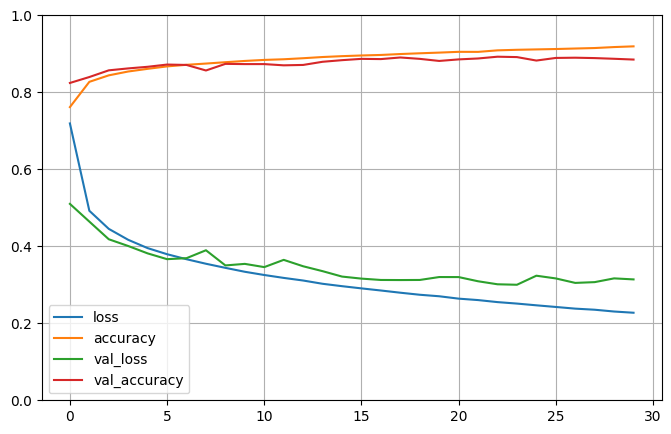

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Una vez entrenado el modelo, se debe evaluar en el conjunto de prueba para estimar el error de generalización antes de implementar el modelo en producción. Se puede hacer esto fácilmente usando el método `evaluate()` (también es compatible con varios otros argumentos, como `batch_size` y `sample_weight`:

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.2413 - accuracy: 0.8412


[66.24125671386719, 0.8411999940872192]

## Predictions
Usando el modelo para hacer predicciones (prueba real, sin etiqueta)

A continuación, podemos usar el método `predict()` del modelo para hacer predicciones en nuevas muestras (imágenes). Dado que no tenemos muestras nuevas reales, solo usaremos algunas del conjunto de prueba:

In [17]:
indices = [118,90,75] #np.random.choice(len(X_test), 3, replace=False)
X_new = X_test[indices]
y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 75ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Si solo importa la clase con la probabilidad estimada más alta (incluso si esa probabilidad es bastante baja), se puede buscar la posición de la probabilidad más alta sobre el eje de las columnas:

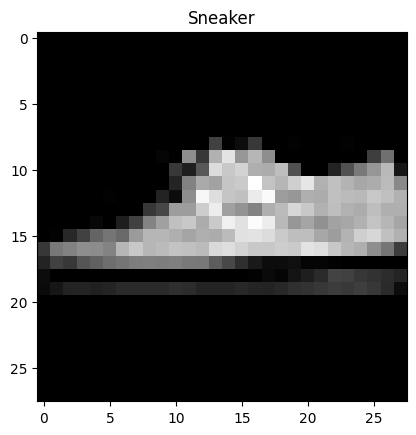

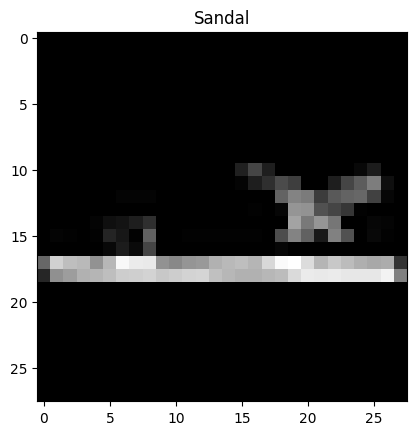

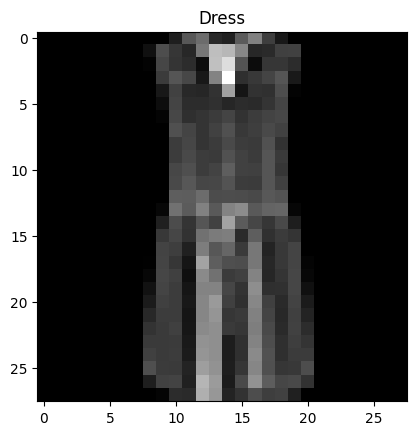

In [19]:
y_classes = y_proba.argmax(axis=-1) #If we wan't to get the value with the highest score

for yi, Xi in zip(y_classes,X_new):
  plt.imshow(Xi,cmap='gray')
  plt.title(class_names[yi])
  plt.show()

#Actividad 1 - Variando los hiperparametros de entranamiento

* Reentrene la red creada variando los hiperparámetros del entrenamiento como la tasa de aprendizaje y el tamaño del lote.
(pruebe al menos 5 valores de c/u)

* Grafique las curvas de aprendizaje y escoja el mejor conjunto de hiperparámetros para este modelo.

In [20]:
'''
model.compile()
history = model.fit()

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

'''

'\nmodel.compile()\nhistory = model.fit()\n\npd.DataFrame(history.history).plot(figsize=(8, 5))\nplt.grid(True)\nplt.gca().set_ylim(0, 1) # set the vertical range to [0-1]\nplt.show()\n\n'

#Actividad 2 - Variando el modelo

* Pruebe diferentes arquitecturas y cada una de ellas entrénela varias veces. Dentro de un ciclo, puede hacer una copia del modelo base y entrenar la copia para evitar entrenar la misma red muchas veces: `model_cloned = keras.models.clone_model(model)` -> (cambie neuronas, activaciones de las arquitecturas 1,2 y 3, ademas, si quiere adicionar mas capas o quitar)

* Los aciertos de clasificación quedan en `X_test` para cada repetición (en filas) y cada arquitectura (en columnas).

* Construimos un boxplot con los de aciertos para visualizar el desempeño general de las redes entrenadas y seleccionar la mejor. Vea [boxplot with Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).



In [21]:
muestras = 2 #veces que se entrena una misma arquitectura
epocas = 2
#arquitectura 1------------------------------------------------
Arq1 = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                 ])
model_cloned1 = keras.models.clone_model(Arq1)
arr = np.zeros(muestras)


#varias veces entrenando y probando Xtest
fila = np.zeros(muestras)
for i in range(muestras):
  model_cloned1.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=0.01) ,
                metrics=["accuracy"])
  history = model_cloned1.fit(X_train, y_train, epochs=epocas,
                      validation_data=(X_valid, y_valid),
                      batch_size=60)
  fila[i] = model_cloned1.evaluate(X_test, y_test)[1] #guardando accuracy
#Armando la matrix de resultados y arquitecturas
arr=np.append(arr.T,fila.T,axis=0)



#Arquitectura 2-----------------------------------------
Arq2 = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="sigmoid")
                                 ])
model_cloned2 = keras.models.clone_model(Arq2)
fila2 = np.zeros(muestras)
for i in range(muestras):
  model_cloned2.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=0.01) ,
                metrics=["accuracy"])
  history = model_cloned2.fit(X_train, y_train, epochs=epocas,
                      validation_data=(X_valid, y_valid),
                      batch_size=60)
  fila2[i] = model_cloned2.evaluate(X_test, y_test)[1] #guardando accuracy



#Arquitectura 3-----------------------------------------
Arq3 = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.Dense(300, activation="sigmoid"),
                                 keras.layers.Dense(300, activation="sigmoid")
                                 ])
model_cloned3 = keras.models.clone_model(Arq3)
fila3 = np.zeros(muestras)
for i in range(muestras):
  model_cloned3.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=0.01) ,
                metrics=["accuracy"])
  history = model_cloned3.fit(X_train, y_train, epochs=epocas,
                      validation_data=(X_valid, y_valid),
                      batch_size=60)
  fila3[i] = model_cloned3.evaluate(X_test, y_test)[1] #guardando accuracy

Epoch 1/2
917/917 [==============================] - 4s 3ms/step - loss: 0.8412 - accuracy: 0.7334 - val_loss: 0.5802 - val_accuracy: 0.8014
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 72.6404 - accuracy: 0.7929
Epoch 1/2
917/917 [==============================] - 4s 3ms/step - loss: 0.4838 - accuracy: 0.8316 - val_loss: 0.4628 - val_accuracy: 0.8424
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 71.4902 - accuracy: 0.8126
Epoch 1/2
917/917 [==============================] - 4s 4ms/step - loss: 1.0005 - accuracy: 0.7155 - val_loss: 0.6575 - val_accuracy: 0.7820
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 65.9493 - accuracy: 0.7888
Epoch 1/2
917/917 [==============================] - 3s 3ms/step - loss: 0.5323 - accuracy: 0.8220 - val_loss: 0.5097 - val_accuracy: 0.8316
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 71.0345 - accuracy: 0.8029
Epoch 1/2
917/917 [=================

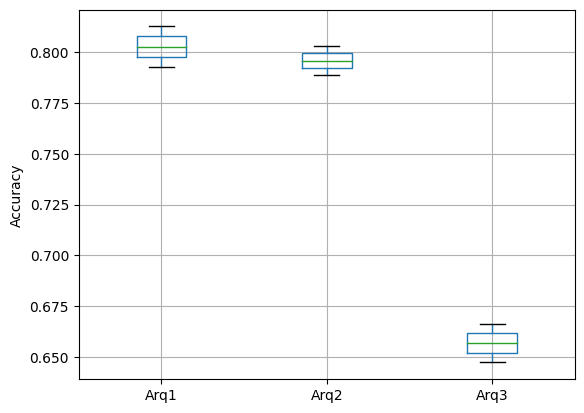

In [22]:
#Armando la matrix de resultados y arquitecturas
arr=np.append(fila,fila2,axis=0)
arr=np.append(arr,fila3,axis=0)
arr=arr.reshape(3,muestras).T
df = pd.DataFrame(arr,
                  columns=['Arq1', 'Arq2', 'Arq3'])
boxplot = df.boxplot(column=['Arq1', 'Arq2', 'Arq3'])
# Añadir label al eje Y
plt.ylabel('Accuracy')

# Mostrar el gráfico
plt.show()

#Parte 2. Predictor

* Con secuencial API, crearemos un precitor del valor de las casas en la base de datos California.

  * La capa de salida debe tener una única neurona porque solo queremos predecir un único valor y no tiene función de activación porque la salida son valores reales.

  * Además, la función de costo es el error cuadrático medio ya que es predicción `loss='mean_squared_error'`.

* Analice la curva de aprendizaje para garantizar la convergencia del algoritmo y que se esté evitando el sobre ajuste con los datos `X_valid,y_valid`

* [Extra] utilizaremos StandardScaler como preprocesamiento de datos.

StandardScaler(): es una función de preprocesamiento en aprendizaje automático, se utiliza para estandarizar características eliminando la media y escalando a la varianza unitaria. Básicamente, transforma los datos de manera que tengan una media igual a 0 y una desviación estándar igual a 1. Esto es útil para algoritmos que asumen que las características están normalmente distribuidas y tienen la misma escala.



In [53]:
housing = fetch_california_housing()
X_train_full2, X_test_2, y_train_full2, y_test_2 = train_test_split(housing.data, housing.target)

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_train_full2, y_train_full2)

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_valid2 = scaler.transform(X_valid2)
X_test_2t = scaler.transform(X_test_2)

print('Conjunto de entrenamiento:')
print(X_train2.shape,y_train2.shape)

print('Conjunto de validación:')
print(X_valid2.shape,y_valid2.shape)

print('Conjunto de prueba:')
print(X_test_2t.shape,y_test_2.shape)

Conjunto de entrenamiento:
(11610, 8) (11610,)
Conjunto de validación:
(3870, 8) (3870,)
Conjunto de prueba:
(5160, 8) (5160,)


In [36]:
print(f"Datos: {housing.feature_names}\nTarget: {housing.target_names}")

Datos: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: ['MedHouseVal']


In [70]:
from tensorflow import keras

model1 = keras.models.Sequential(
        [keras.layers.Dense(90,activation="relu", input_shape=X_train2.shape[1:]),
         keras.layers.Dense(30,activation="relu"),
         keras.layers.Dense(1)]
        )

model1.compile(loss="mean_squared_error",
              optimizer="adam")

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 1.0492 - val_loss: 0.4342
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4111 - val_loss: 0.3565
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3744 - val_loss: 0.3363
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3694 - val_loss: 0.3198
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3482 - val_loss: 0.3264
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3322 - val_loss: 0.3063
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3284 - val_loss: 0.3154
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3269 - val_loss: 0.3085
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3251 - val_loss: 0.2927
Epoch 10/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3279 - val_loss: 0.2999

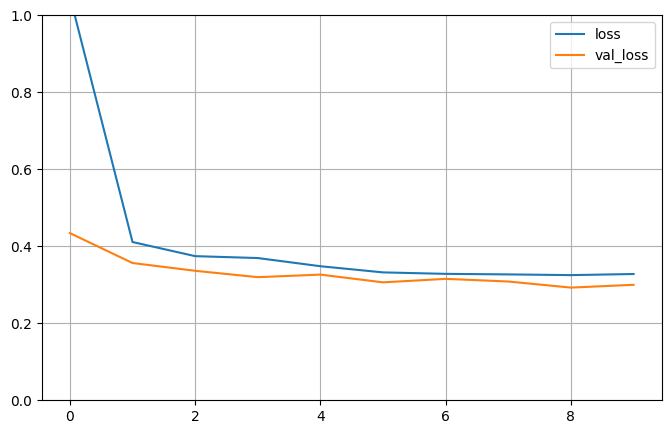

In [71]:
history = model1.fit(X_train2, y_train2, epochs=10,
                    validation_data=(X_valid2, y_valid2))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()



In [72]:
mse_test = model1.evaluate(X_test_2t, y_test_2)


162/162 [==============================] - 0s 2ms/step - loss: 0.3361


In [73]:
#revisando una prediccion
X_new = X_test_2t[:3] # pretend these are new instances
y_pred2 = model1.predict(X_new)
print("y predict", y_pred2.T, "y test", y_test_2[:3])

1/1 [==============================] - 0s 46ms/step
y predict [[2.0904756 1.1847806 2.5800178]] y test [1.81  0.865 1.563]
